# Craigslist Capstone Project - Exploratory Data Analysis

#### The goal of this capstone is to predict market rent prices in the San Francisco Bay Area. The metros of interest are San Francisco, Peninsula, East Bay. 

Prior to this notebook, the data was parsed from html, cleaned and transformed. 

#### This notebook covers the scope of 

1. Explore The Data
2. Correlation between variables
3. Baseline price prediction
4. Drop unnecessary columns

## Importing the libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import warnings # For handling error messages. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [34]:
# Neighborhoods in SF
SFC_NEIGHBORHOODS = ['alamo square / nopa', 'bayview', 'bernal heights', 'castro / upper market', 'cole valley / ashbury hts', 'downtown / civic / van ness',
 'excelsior / outer mission', 'financial district', 'glen park', 'haight ashbury', 'hayes valley', 'ingleside / SFSU / CCSF', 'inner richmond',
 'inner sunset / UCSF', 'laurel hts / presidio', 'lower haight', 'lower nob hill', 'lower pac hts', 'marina / cow hollow', 'mission district',
 'nob hill', 'noe valley', 'north beach / telegraph hill', 'pacific heights', 'portola district', 'potrero hill', 'richmond / seacliff', 'russian hill', 
'SOMA / south beach', 'sunset / parkside', 'tenderloin','treasure island', 'twin peaks / diamond hts', 'USF / panhandle', 'visitacion valley', 
'west portal / forest hill', 'western addition']

# Neighborhoods in Peninsula
PEN_NEIGHBORHOODS = ['atherton','belmont','brisbane','burlingame','coastside/pescadero','daly city','east palo alto','foster city','half moon bay','los altos','menlo park','millbrae',
                     'mountain view','pacifica','palo alto','portola valley','redwood city','redwood shores','san bruno','san carlos','san mateo','south san francisco','woodside']

# Neighborhoods in the East Bay
EBY_NEIGHBORHOODS = ['alameda','albany / el cerrito','berkeley','berkeley north / hills','brentwood / oakley','concord / pleasant hill / martinez','danville / san ramon',
                     'dublin / pleasanton / livermore','emeryville','fairfield / vacaville','fremont / union city / newark','hayward / castro valley','hercules, pinole, san pablo, el sob',
                     'lafayette / orinda / moraga','oakland downtown','oakland east','oakland hills / mills','oakland lake merritt / grand','oakland north / temescal',
                     'oakland piedmont / montclair','oakland rockridge / claremont','oakland west','pittsburg / antioch','richmond / point / annex','san leandro','vallejo / benicia','walnut creek']
#List of cities
SFC_CITIES = ['San Francisco']
PEN_CITIES = ['Palo Alto','San Mateo','Mountain View','Redwood City','Menlo Park','Daly City','San Bruno','South San Francisco','Foster City','Burlingame']
EBY_CITIES = ['Oakland','Berkeley','Fremont','Walnut Creek','Concord','Hayward','Alameda','Pleasanton','San Leandro','Vallejo','San Ramon','Emeryville',
        'Dublin','Richmond','Fairfield','Livermore','Antioch','Pittsburg','Union City','El Cerrito']

ALL_CITIES = SFC_CITIES + PEN_CITIES + EBY_CITIES

# Dictionaries for neighborhood and city relationship
METRO_TO_NEIGHBORHOODS = {'sfc': SFC_NEIGHBORHOODS, 'pen': PEN_NEIGHBORHOODS, 'eby': EBY_NEIGHBORHOODS}
METRO_TO_CITIES = {'sfc': SFC_CITIES, 'pen': PEN_CITIES, 'eby': EBY_CITIES}

NEIGHBORHOOD_TO_METRO = {neighborhood: metro for metro, neighborhoods in METRO_TO_NEIGHBORHOODS.items() for neighborhood in neighborhoods}
CITY_TO_METRO = {city: metro for metro,cities in METRO_TO_CITIES.items() for city in cities}

# # Create a dictionary mapping listing_info values to the categorical column name
# LISTING_INFO_TO_COLUMN = {'cats are OK - purrr':'animals_cats','dogs are OK - wooof':'animals_dogs','furnished':'furnished',
#                     'no smoking':'smoking','wheelchair accessible':'wheelchair accessible','air conditioning':'has_AC',
#                      'EV charging':'hasEVCharging','laundry in bldg':'laundry_in_bldg','w/d in unit':'laundry_in_unit',
#                      'w/d hookups':'laundry_has_hookup','laundry on site':'laundry_onsite','no laundry on site':'laundry_not_onsite',
#                      'carport':'parking_carport','attached garage':'parking_attached_garage','detached garage':'parking_detached_garage',
#                      'off-street parking':'parking_offstreet','street parking':'parking_street','valet parking':'parking_valet','no parking':'parking_none',
#                      'rent period: daily':'rent_period_daily','rent period: weekly':'rent_period_weekly','rent period: monthly':'rent_period_monthly',
#                      'condo':'housing_condo','apartment':'housing_apt','cottage/cabin':'housing_cottage','duplex':'housing_duplex',
#                      'flat':'housing_flat','house':'housing_house','in-law':'housing_inlaw','loft':'housing_inlaw','townhouse':'housing_townhouse'}

# # Create a dictionary mapping listing_body features to the categorical column name
# LISTING_BODY_TO_COLUMN = {'rent control':'is_rent_controlled','no pets':'pets_allowed','remodelled':'is_remodelled',
#                          '(amenities)|(pool)|(gym)|(spa)':'has_amenities'}

## Load the data

In [35]:
# The cleaned html listing data is the interim directory
dir_folder = '/Users/pandabear/springboard/CapstoneTwoProject/data/interim/'
df = pd.read_csv(dir_folder + 'listing_df_cleaned_ws.csv',index_col='listing_id')

In [36]:
df.head()

,listing_title,listing_nh,listing_city,listing_date,listing_price,listing_bedrooms,listing_bathrooms,listing_sqft,listing_address,listing_info,...,housing_house,housing_inlaw,housing_townhouse,is_rent_controlled,pets_allowed,is_remodelled,has_amenities,walk_score,transit_score,bike_score
listing_id,,,,,,,,,,,,,,,,,,,,,
7495842903,"$1695/1br - Spacious, Furnished Studio on Quie...",palo alto,Palo Alto,2022-06-13 01:02:29-07:00,1695,1,1,400.0,Charleston near Alma,apartment w/d in unit street parking rent ...,...,0,0,0,0,1,0,1,85.0,46.0,100.0
7495966009,"LIVE/WORK/ART LOFT NATURAL SUNLIGHT, INDUSTRIA...",mission district,San Francisco,2022-06-13 08:59:09-07:00,4999,1,1,927.0,555 Florida St. near Mariposa,open house dates thursday 2022-07-28 fri...,...,0,0,0,0,1,0,1,97.0,83.0,100.0
7496082921,"$2,125 Studio! Jingle Town! Welcome To 3030 Ch...",oakland east,Oakland,2022-06-13 12:22:44-07:00,2125,0,1,505.0,3030 Chapman Street near derby,cats are OK - purrr dogs are OK - wooof apa...,...,0,0,0,0,0,0,1,89.0,72.0,91.0
7496092147,Nicely Renovated 2bd/1ba W/New Carpet in Bedro...,oakland east,Oakland,2022-06-13 12:40:39-07:00,2350,2,1,NaN,3050 Fruitvale Ave.,application fee details: Credit Report Check ...,...,0,0,0,0,1,0,1,83.0,57.0,51.0
7496134063,ID#573: Pac Hgts 2BR/1BA Flat w/Pkg & Shared Yd,pacific heights,San Francisco,2022-06-13 14:03:39-07:00,4500,2,1,NaN,Fillmore Street near Jackson Street,apartment laundry in bldg no smoking attac...,...,0,0,0,0,0,0,1,94.0,82.0,57.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10319 entries, 7495842903 to 7528876520
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   listing_title            10319 non-null  object 
 1   listing_nh               10319 non-null  object 
 2   listing_city             10319 non-null  object 
 3   listing_date             10319 non-null  object 
 4   listing_price            10319 non-null  int64  
 5   listing_bedrooms         10319 non-null  object 
 6   listing_bathrooms        10319 non-null  object 
 7   listing_sqft             6914 non-null   float64
 8   listing_address          9997 non-null   object 
 9   listing_info             10319 non-null  object 
 10  listing_body             10319 non-null  object 
 11  listing_url              10319 non-null  object 
 12  listing_first_image      10319 non-null  object 
 13  listing_info_split       10319 non-null  object 
 14  animals_

## 1. Explore The Data

Text(0, 0.5, 'City')

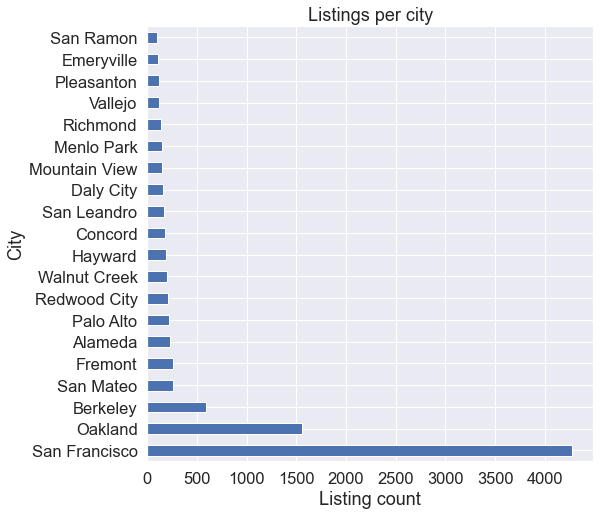

In [38]:
# Plot the distribution of listings per city
df['listing_city'].value_counts().head(20).plot(kind='barh',figsize=(8,8))
plt.title("Listings per city")
plt.xlabel("Listing count")
plt.ylabel("City")

In [39]:
# Count frequency of listings by neighborhood and city
nh_count = df[['listing_nh','listing_city']].value_counts().reset_index()
nh_count.columns = ['neighborhood', 'city', 'count']
nh_metro_df = pd.DataFrame(nh_count)
nh_metro_df['metro'] = nh_metro_df.apply(lambda x: CITY_TO_METRO[x.city], axis=1)
nh_metro_df.head()

,neighborhood,city,count,metro
0,berkeley,Berkeley,511,eby
1,oakland lake merritt / grand,Oakland,469,eby
2,SOMA / south beach,San Francisco,456,sfc
3,mission district,San Francisco,336,sfc
4,nob hill,San Francisco,317,sfc


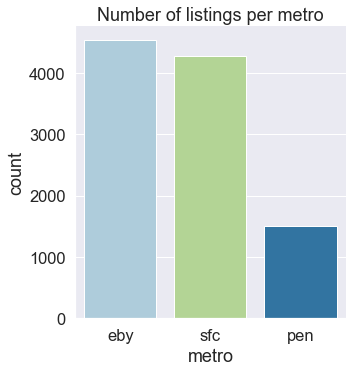

In [40]:
metro_total = pd.DataFrame(nh_metro_df.groupby(['metro'])['count'].sum()).reset_index()
metro_total
sns.catplot(data=metro_total, x="metro", y="count", hue='metro', kind='bar', dodge=False, order=['eby','sfc','pen'], palette=sns.color_palette('Paired')).set(title="Number of listings per metro")


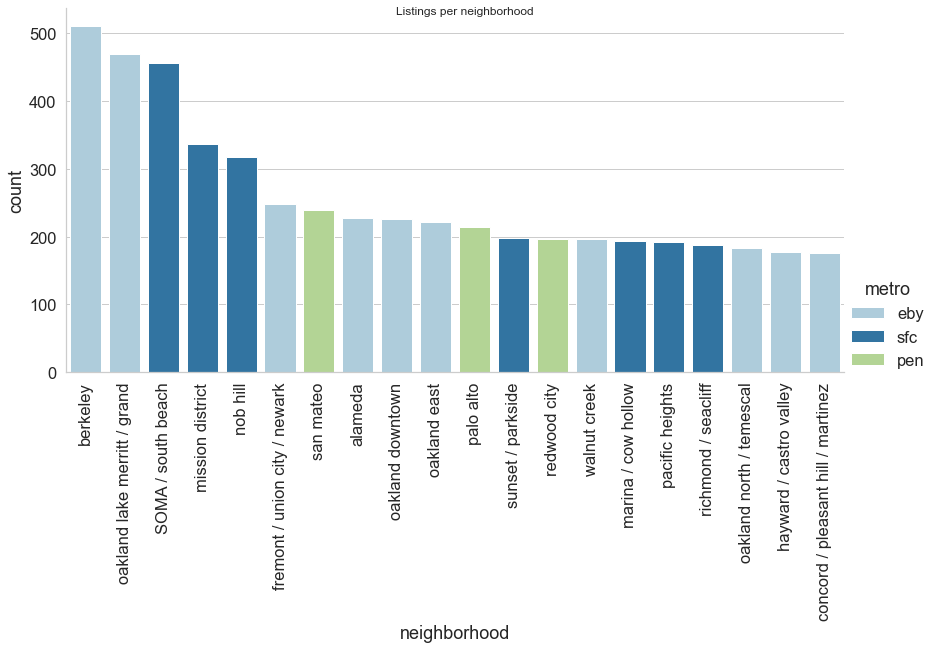

In [41]:
sns.set_style(style="whitegrid")
g = sns.catplot(x='neighborhood', y='count', data = nh_metro_df[:20], hue='metro', kind='bar',height=6, aspect=2, dodge=False, palette=sns.color_palette('Paired'))
g.fig.suptitle("Listings per neighborhood")
g.set_xticklabels(rotation=90)

There seems to be an equal spread of listings across the metros. 


In [42]:
nh_metro_df.shape
#.metro.value_counts()

(149, 4)

In [43]:
sorted_prices_by_city = df.groupby('listing_city').listing_price.mean().sort_values().reset_index()
sorted_city_list = sorted_prices_by_city['listing_city']
sorted_prices_by_city

,listing_city,listing_price
0,Vallejo,2197.570248
1,Antioch,2367.282051
2,Fairfield,2443.324675
3,Concord,2493.100000
4,San Leandro,2505.436047
5,Pittsburg,2573.750000
6,Richmond,2578.728571
7,Hayward,2623.481481
8,Oakland,2718.250800
9,El Cerrito,2849.593407


Text(0.5, 1.0, 'Listing City vs Listing Price (sorted by mean price per city)')

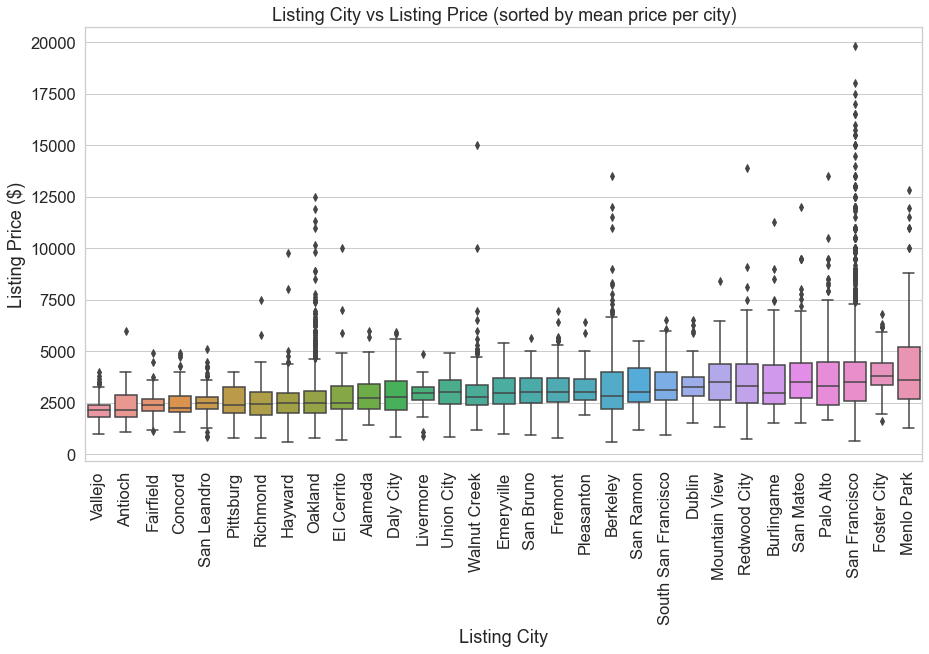

In [44]:
# Boxplot of the distribution of prices for each city
plt.subplots(figsize=(15, 8))
sns.boxplot(x='listing_city', y='listing_price', data=df, order = sorted_city_list)
plt.xticks(rotation='vertical')
plt.ylabel('Listing Price ($)')
plt.xlabel('Listing City')
plt.title('Listing City vs Listing Price (sorted by mean price per city)')

[(500.0, 20000.0)]

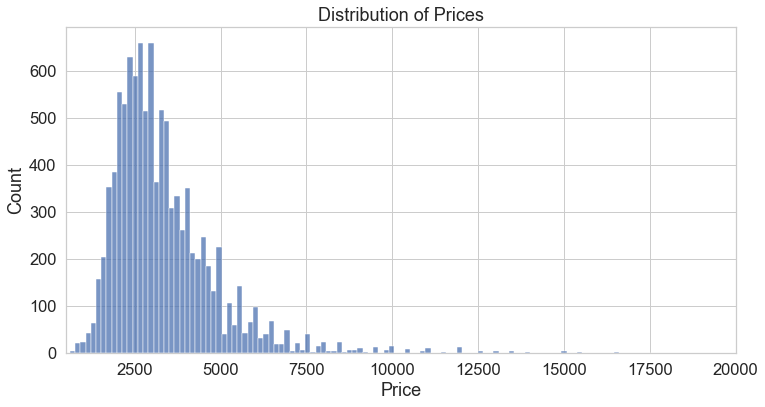

In [45]:
# Look at the distribution of price
plt.figure(figsize=(12, 6))
g = sns.histplot(data=df['listing_price'], palette=sns.color_palette('Paired'))
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel('Count')
g.set(xlim=(500,20000))

In [46]:
df['listing_bedrooms'].unique()

array(['1', '0', '2', '4', '3', '5', '6+'], dtype=object)

In [47]:
df['listing_bathrooms'].unique()

array(['1', '2', '1.5', '3', '2.5', '3.5', 'shared', '4+'], dtype=object)

In [48]:
# Convert the bedroom and bathroom features into numeric ones
df.loc[:,"no_bedrooms"] = pd.to_numeric(df["listing_bedrooms"].str.replace('+', ''))
df.loc[:,"no_bathrooms"] = pd.to_numeric(df["listing_bathrooms"].str.replace('+', '').str.replace('shared', '0.5'))

Text(59.73354023498116, 2200, 'mean: 76')

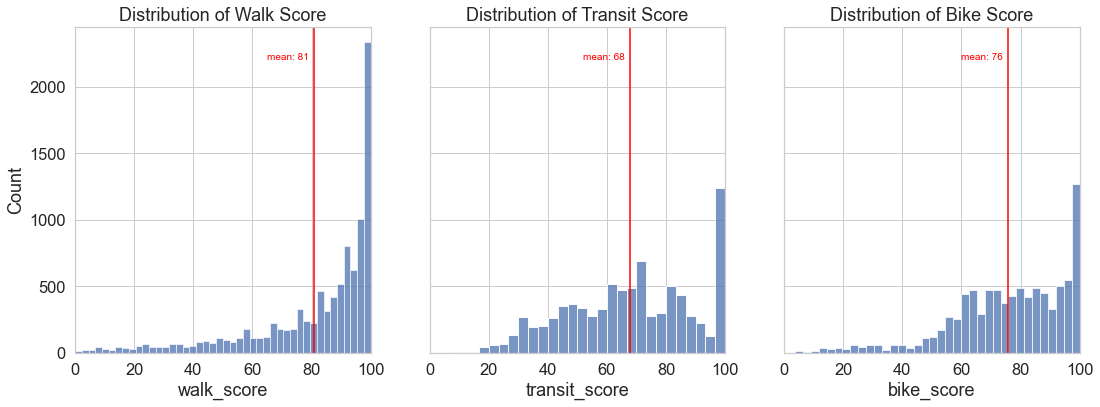

In [49]:
# Look at the distribution of walk, transit and bike scores per neighborhood
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(18,6))
g1 = sns.histplot(data=df['walk_score'], ax=ax1)
g2 = sns.histplot(data=df['transit_score'], ax=ax2)
g3 = sns.histplot(data=df['bike_score'], ax=ax3)
g1.axvline(df['walk_score'].mean(), color='red')
g2.axvline(df['transit_score'].mean(), color='red')
g3.axvline(df['bike_score'].mean(), color='red')
ax1.set_xlim(0, 100)
ax2.set_xlim(0, 100)
ax3.set_xlim(0, 100)
ax1.set_title("Distribution of Walk Score")
ax2.set_title("Distribution of Transit Score")
ax3.set_title("Distribution of Bike Score")
ax1.text(x = df['walk_score'].mean()-16, y=2200, s = 'mean: {:.0f}'.format(df['walk_score'].mean()), color = 'red')
ax2.text(x = df['transit_score'].mean()-16, y=2200, s = 'mean: {:.0f}'.format(df['transit_score'].mean()), color = 'red')
ax3.text(x = df['bike_score'].mean()-16, y=2200, s = 'mean: {:.0f}'.format(df['bike_score'].mean()), color = 'red')

It looks like there are many places with walk scores close to 100. This makes sense as a lot of the neighborhoods are very urban. 

## 2. Correlation between variables

In [50]:
df.head()

,listing_title,listing_nh,listing_city,listing_date,listing_price,listing_bedrooms,listing_bathrooms,listing_sqft,listing_address,listing_info,...,housing_townhouse,is_rent_controlled,pets_allowed,is_remodelled,has_amenities,walk_score,transit_score,bike_score,no_bedrooms,no_bathrooms
listing_id,,,,,,,,,,,,,,,,,,,,,
7495842903,"$1695/1br - Spacious, Furnished Studio on Quie...",palo alto,Palo Alto,2022-06-13 01:02:29-07:00,1695,1,1,400.0,Charleston near Alma,apartment w/d in unit street parking rent ...,...,0,0,1,0,1,85.0,46.0,100.0,1,1.0
7495966009,"LIVE/WORK/ART LOFT NATURAL SUNLIGHT, INDUSTRIA...",mission district,San Francisco,2022-06-13 08:59:09-07:00,4999,1,1,927.0,555 Florida St. near Mariposa,open house dates thursday 2022-07-28 fri...,...,0,0,1,0,1,97.0,83.0,100.0,1,1.0
7496082921,"$2,125 Studio! Jingle Town! Welcome To 3030 Ch...",oakland east,Oakland,2022-06-13 12:22:44-07:00,2125,0,1,505.0,3030 Chapman Street near derby,cats are OK - purrr dogs are OK - wooof apa...,...,0,0,0,0,1,89.0,72.0,91.0,0,1.0
7496092147,Nicely Renovated 2bd/1ba W/New Carpet in Bedro...,oakland east,Oakland,2022-06-13 12:40:39-07:00,2350,2,1,NaN,3050 Fruitvale Ave.,application fee details: Credit Report Check ...,...,0,0,1,0,1,83.0,57.0,51.0,2,1.0
7496134063,ID#573: Pac Hgts 2BR/1BA Flat w/Pkg & Shared Yd,pacific heights,San Francisco,2022-06-13 14:03:39-07:00,4500,2,1,NaN,Fillmore Street near Jackson Street,apartment laundry in bldg no smoking attac...,...,0,0,0,0,1,94.0,82.0,57.0,2,1.0


In [51]:
# Look at the correlation between variables
df.corr()

,listing_price,listing_sqft,animals_cats,animals_dogs,furnished,smoking,wheelchair accessible,has_AC,hasEVCharging,laundry_in_bldg,...,housing_townhouse,is_rent_controlled,pets_allowed,is_remodelled,has_amenities,walk_score,transit_score,bike_score,no_bedrooms,no_bathrooms
listing_price,1.000000,0.698701,0.052005,0.116650,0.044641,0.031642,0.052377,0.072237,0.118905,-0.142267,...,0.031682,-0.008101,-0.082417,0.001734,0.118561,0.036818,0.141344,0.040401,0.597230,0.613464
listing_sqft,0.698701,1.000000,-0.092352,-0.045002,0.000152,-0.028863,-0.083729,0.087110,0.000876,-0.184532,...,0.111782,-0.060393,0.004960,-0.011045,0.047229,-0.201597,-0.085019,-0.126186,0.754278,0.750569
animals_cats,0.052005,-0.092352,1.000000,0.819042,-0.007001,0.195339,0.272248,0.157751,0.232201,0.026628,...,-0.033203,0.067100,-0.437753,-0.001923,0.101817,0.023100,0.024640,0.037329,-0.079898,-0.021360
animals_dogs,0.116650,-0.045002,0.819042,1.000000,0.027956,0.191770,0.309930,0.203552,0.253909,-0.036249,...,-0.013965,0.047171,-0.390211,-0.004533,0.127827,-0.008470,0.022007,0.025098,-0.025043,0.033635
furnished,0.044641,0.000152,-0.007001,0.027956,1.000000,0.068603,0.102241,0.119496,0.092044,-0.004573,...,0.000252,-0.036094,-0.020932,0.019074,-0.019794,0.020345,0.033624,0.041360,-0.019130,0.010499
smoking,0.031642,-0.028863,0.195339,0.191770,0.068603,1.000000,0.170294,0.191104,0.133244,0.090083,...,0.020325,0.038349,0.079752,-0.005711,0.049723,0.038081,0.031683,0.021777,-0.043940,-0.006793
wheelchair accessible,0.052377,-0.083729,0.272248,0.309930,0.102241,0.170294,1.000000,0.335117,0.414197,-0.053758,...,-0.024453,-0.053706,-0.135064,-0.009627,0.122702,0.031070,0.038650,0.100533,-0.080045,0.008183
has_AC,0.072237,0.087110,0.157751,0.203552,0.119496,0.191104,0.335117,1.000000,0.315972,-0.129787,...,0.098920,-0.074271,-0.065556,-0.012063,0.095579,-0.187882,-0.181475,-0.050296,0.057287,0.157371
hasEVCharging,0.118905,0.000876,0.232201,0.253909,0.092044,0.133244,0.414197,0.315972,1.000000,-0.078816,...,0.001360,-0.040836,-0.108292,0.015615,0.099230,0.002365,0.013534,0.051192,-0.023598,0.067051
laundry_in_bldg,-0.142267,-0.184532,0.026628,-0.036249,-0.004573,0.090083,-0.053758,-0.129787,-0.078816,1.000000,...,-0.064842,0.089505,0.068955,-0.009237,-0.019676,0.167274,0.141235,0.061234,-0.196052,-0.192938


Text(0.5, 1.0, 'Heatmap of craigslist features')

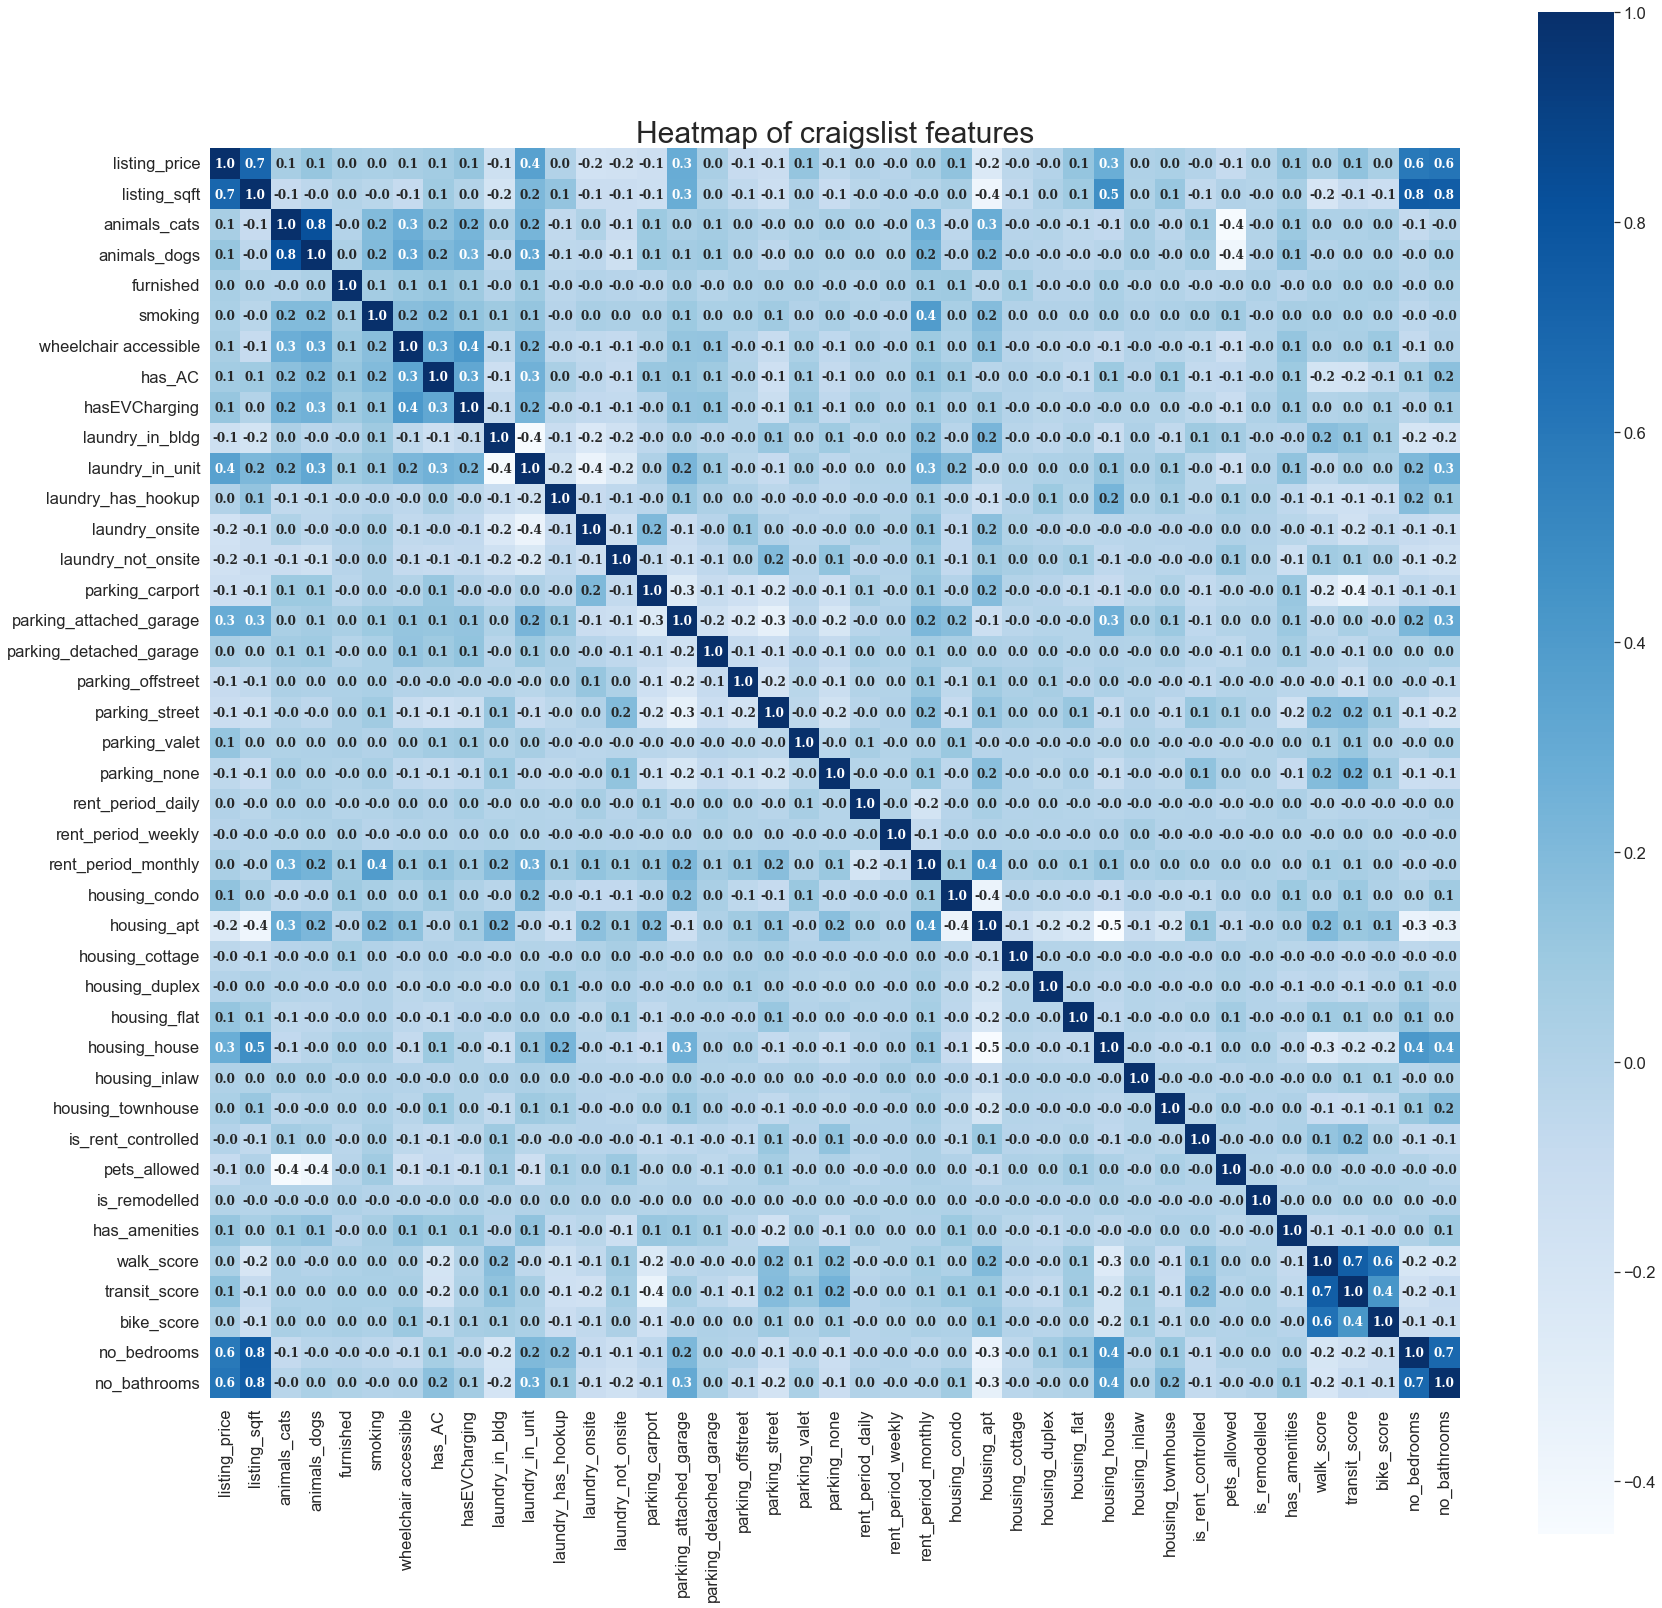

In [52]:
#Make a heatmap of the data 
plt.figure(figsize=(28, 28))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(), cmap='Blues',
            annot=True,
            fmt=".1f",
            annot_kws={
                'fontsize': 12,
                'fontweight': 'bold',
                'fontfamily': 'serif'
            },square=True)
plt.title('Heatmap of craigslist features', fontsize = 30) 


Numeric features that seem most correlated with price are:
* Listing_sqft
* Number of bedrooms
* Number of bathrooms
* Laundry in unit
* Parking in an attached garage
* A house, apartment or condo
* Allows cats or dogs
* Valet parking
* Has EV charging

Other features that are noteworthy: 
* Walk score, transit score and bike score are highly correlated
* Number of bedrooms and bathrooms is correlated to square footage
* Allowing cats and dogs
* Rental type house and listing sqft

Features that can be dropped because they don't seem to have any correlation:
* rent_period_daily
* rent_period_weekly
* housing_cottage
* housing_duplex
* housing_inlaw
* is_remodelled
* furnished

Text(0.5, 1.0, 'Number of bathrooms vs. Price')

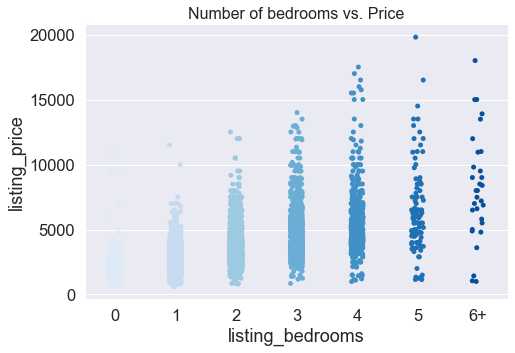

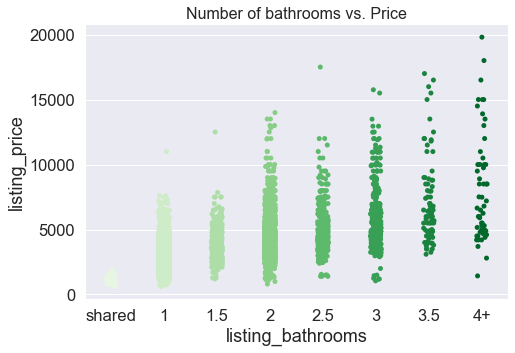

In [53]:
# Plot bedrooms/bathrooms against price
sns.catplot(x='listing_bedrooms', y="listing_price", data=df, order=['0','1','2','3','4','5','6+'], palette="Blues", height=5, aspect=1.5)
plt.title("Number of bedrooms vs. Price", fontsize=16)
sns.catplot(x='listing_bathrooms', y="listing_price", data=df, order=['shared','1','1.5','2','2.5','3','3.5','4+'], palette="Greens", height=5, aspect=1.5)
plt.title("Number of bathrooms vs. Price", fontsize=16)

The plots make sense, as we would expect price to increase with the number of bedrooms/bathrooms. Shared bathroom rentals i.e. SROs seems to be an obvious low price category with few outliers.

(100.0, 20000.0)

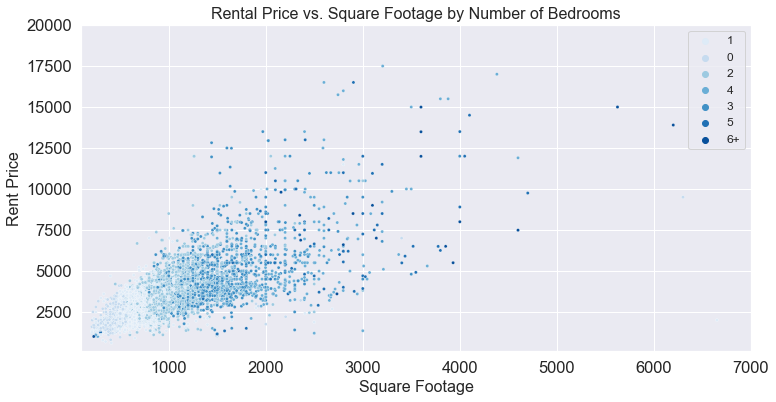

In [54]:
# Plot scatterplot showing distribution of price and sqft
plt.figure(figsize=(12, 6))
sns.scatterplot(y='listing_price', x='listing_sqft', hue='listing_bedrooms', palette='Blues', data=df, s=10)
plt.legend(fontsize=12)
plt.xlabel("Square Footage", fontsize=16)
plt.ylabel("Rent Price", fontsize=16);
plt.title("Rental Price vs. Square Footage by Number of Bedrooms", fontsize=16)
plt.xlim([100, 7000])
plt.ylim([100, 20000])
# x_jitter=True, y_jitter=True, s=125,

## 3. Baseline price prediction

A very basic baseline for price prediction would be the mean price for the number of bedrooms and bathrooms a listing has.
This kind of statistic is often quoted in news articles about rental prices. 
Group by bedroom,bathroom and plot the price distribution

In [55]:
# Find the mean listing_price for number of bedrooms and bathrooms
mean_price_bedroom = df.groupby(['listing_bedrooms','listing_bathrooms']).mean()['listing_price'].reset_index()
mean_price_bedroom

,listing_bedrooms,listing_bathrooms,listing_price
0,0,1,2152.399029
1,0,1.5,3650.000000
2,0,2,5093.400000
3,0,3,9500.000000
4,0,shared,1016.611111
5,1,1,2583.576713
6,1,1.5,3490.282353
7,1,2,4074.897959
8,1,2.5,5216.666667
9,1,shared,1204.666667


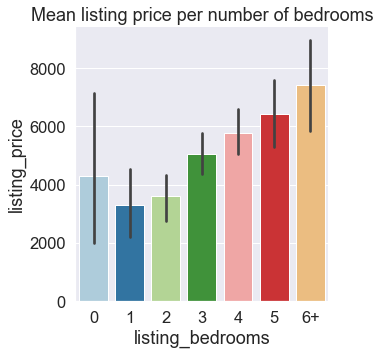

In [56]:
sns.catplot(data=mean_price_bedroom, x="listing_bedrooms", y="listing_price", kind='bar',dodge=False, order=['0','1','2','3','4','5','6+'], palette=sns.color_palette('Paired')).set(title="Mean listing price per number of bedrooms")

There seems to be a much larger variation in price for studios, ranging from 2000 to 7000. The confidence interval is wider, probably because there are outliers dragging up the mean. It also doesn't make sense that studios would be more expensive than one bedroom listings. Try plotting the distribution of 0 bedroom listings against bathrooms:

In [57]:
studio_price = df[df['no_bedrooms'] == 0][['no_bathrooms','listing_price']]
studio_price

,no_bathrooms,listing_price
listing_id,,
7496082921,1.0,2125
7496614697,1.0,2800
7497956692,1.0,1595
7498332944,1.0,2690
7498943609,2.0,7000
...,...,...
7528644162,1.0,2600
7528672511,1.0,1800
7528696934,1.0,2320


Text(0, 0.5, 'Count')

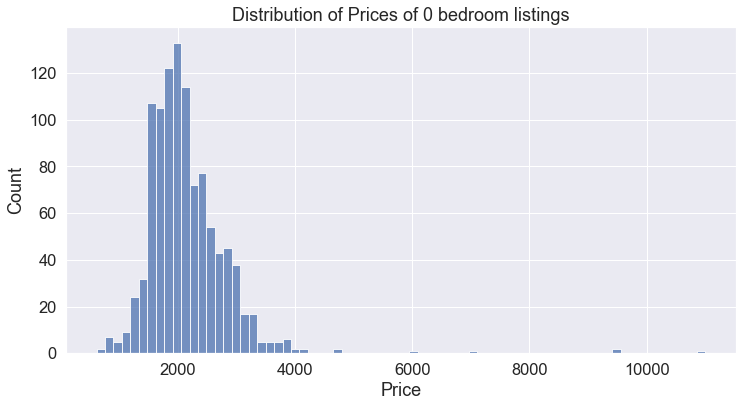

In [58]:
# Look at the distribution of price for 0 bedroom listings
plt.figure(figsize=(12, 6))
g = sns.histplot(data=studio_price['listing_price'], palette=sns.color_palette('Paired'))
plt.title("Distribution of Prices of 0 bedroom listings")
plt.xlabel("Price")
plt.ylabel('Count')

The distribution has a very long tail. I suspect users are defaulting to 0 bedrooms if they forget to change the drop down box in craigslist. This distribution will need outliers removed

## 4. Drop unnecessary columns

In [59]:
# Drop unused categorical features
# Also drop columns that seem to have no effect on price
cat_features = ['listing_title','listing_date','listing_bedrooms','listing_bathrooms','listing_info',
                'listing_body','listing_url','listing_first_image','listing_info_split','rent_period_daily',
                'rent_period_weekly', 'housing_cottage','housing_duplex','housing_inlaw','is_remodelled',
                'furnished']
df.drop(cat_features,axis=1,inplace=True)

In [60]:
df.shape

(10319, 37)

In [61]:
print(f'There are {len(df.listing_city.value_counts())} cities and {len(df.listing_nh.value_counts())} neighborhoods in this dataset')

There are 31 cities and 82 neighborhoods in this dataset


The remaining categorical features neighborhood and city will be imputed with mean price data in the preprocessing portion of this project. 

In [62]:
df.to_csv(r'/Users/pandabear/springboard/CapstoneTwoProject/data/interim/listing_df_EDA.csv', header=True)
print('Saved to csv file')

Saved to csv file
